In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2021-11-05 21:42:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: 'drug200.csv'

     0K .....                                                 100% 2.86G=0s

2021-11-05 21:42:24 (2.86 GB/s) - 'drug200.csv' saved [5827/5827]



In [3]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
my_data.shape

(200, 6)

<h2>Pre-processing</h2>

In [11]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [12]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:, 1] = le_sex.transform(X[:, 1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
X[:, 2] = le_BP.transform(X[:, 2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:, 3] = le_Chol.transform(X[:, 3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [15]:
y = my_data["Drug"]
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<h2>Setting up the Decision Tree</h2>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [19]:
print("X_trainset size: ", X_trainset.shape)
print("y_trainset size: ", y_trainset.shape)

X_trainset size:  (140, 5)
y_trainset size:  (140,)


In [20]:
print("X_testset size: ", X_testset.shape)
print("y_testset size: ", y_testset.shape)

X_testset size:  (60, 5)
y_testset size:  (60,)


<h2>Modeling</h2>

In [21]:
drugTree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

<h2>Prediction</h2>

In [23]:
predTree = drugTree.predict(X_testset)

In [24]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<h2>Evaluation</h2>

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


<h2>Visualization</h2>

In [27]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

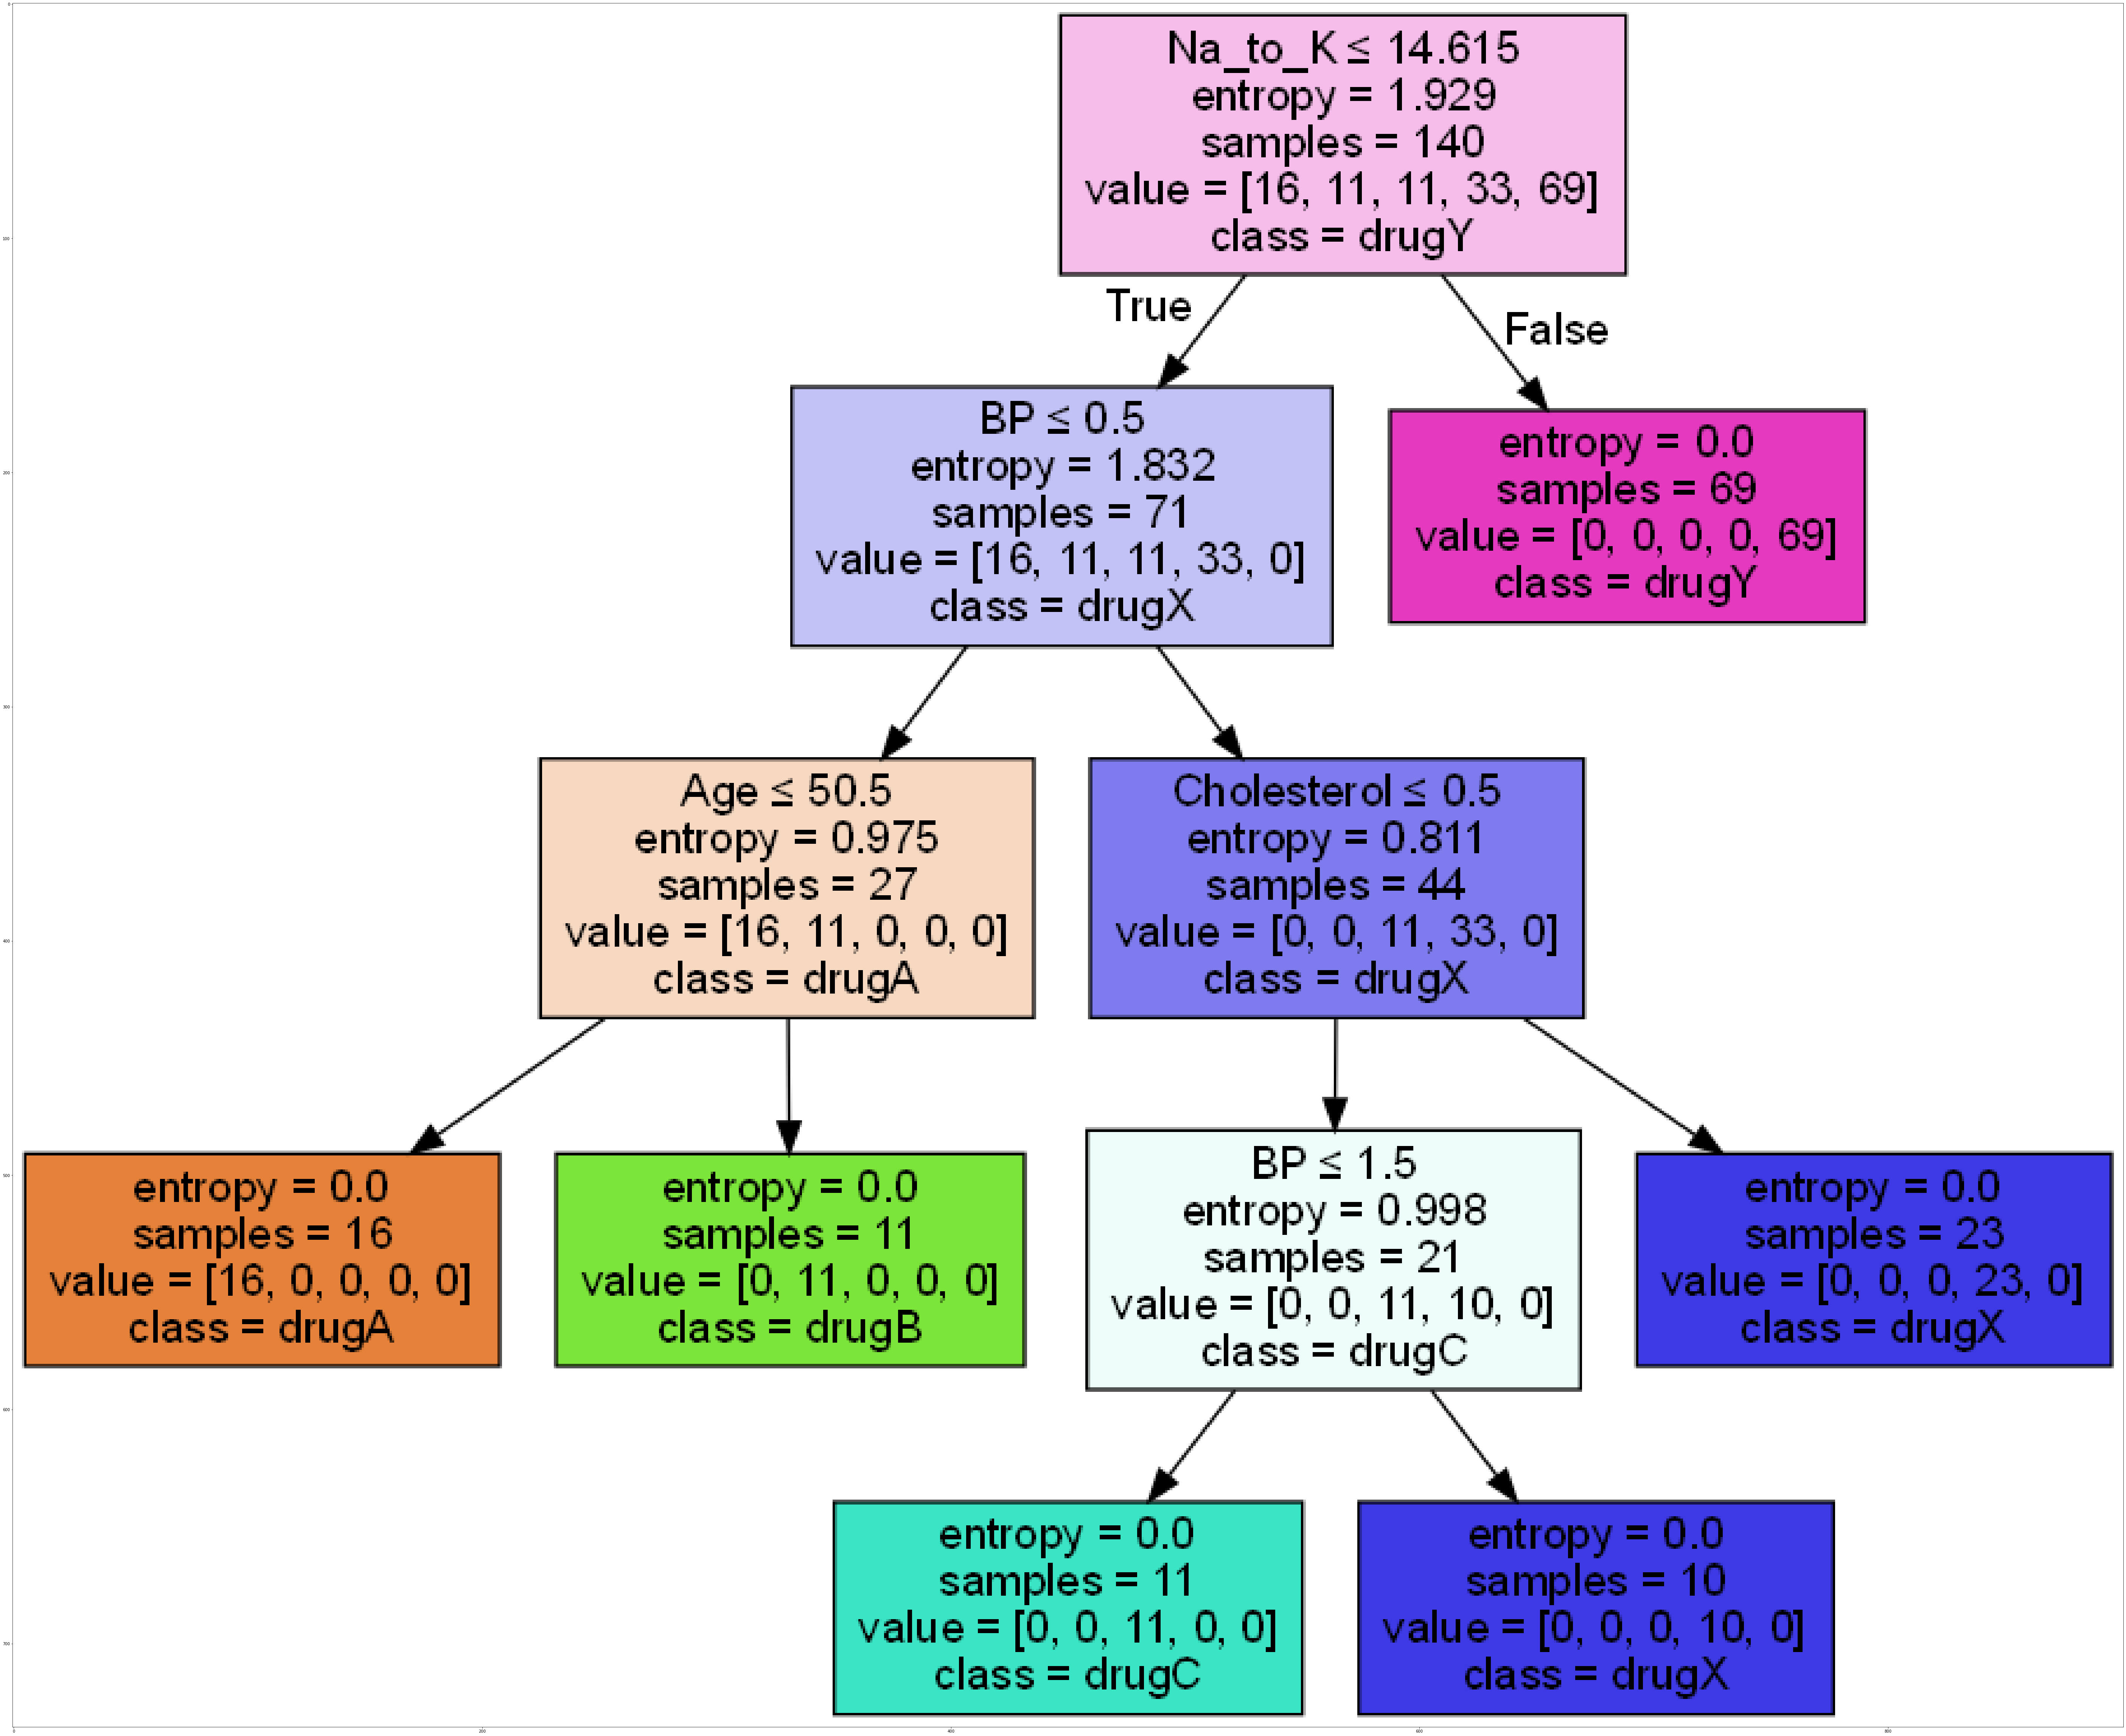

In [28]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')